## 0.0. IMPORTS

In [6]:
!pip install pandas numpy inflection seaborn matplotlib

  Using cached pandas-1.4.1-cp39-cp39-win_amd64.whl (10.5 MB)
  Using cached numpy-1.22.2-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
     -------------------------------------- 292.8/292.8 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 25.6 MB/s eta 0:00:00
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
     --------------------------------------- 36.9/36.9 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 52.1/52.1 KB ? eta 0:00:00
     ------------------------------------- 895.5/895.5 KB 18.8 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 29.6 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import datetime
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

## 0.1. Helper Functions

## 0.2. Loading data

In [8]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

In [9]:
#merge:
df_raw = pd.merge (df_sales_raw, df_store_raw, how='left', on= 'Store')
df_raw.sample()

NameError: name 'df_sales_raw' is not defined

# 1.0. DESCRIÇÃO DE DADOS

## 1.1. Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
#df1.columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

In [7]:
#df1.columns

## 1.2. Data Dimension

In [8]:
print("Number of Rows: {}".format(df1.shape[0]))
print("Number of Collumns: {}".format(df1.shape[1]))

Number of Rows: 1017209
Number of Collumns: 18


## 1.3. Data Types

In [1]:
df1.dtypes

NameError: name 'df1' is not defined

<AxesSubplot:>

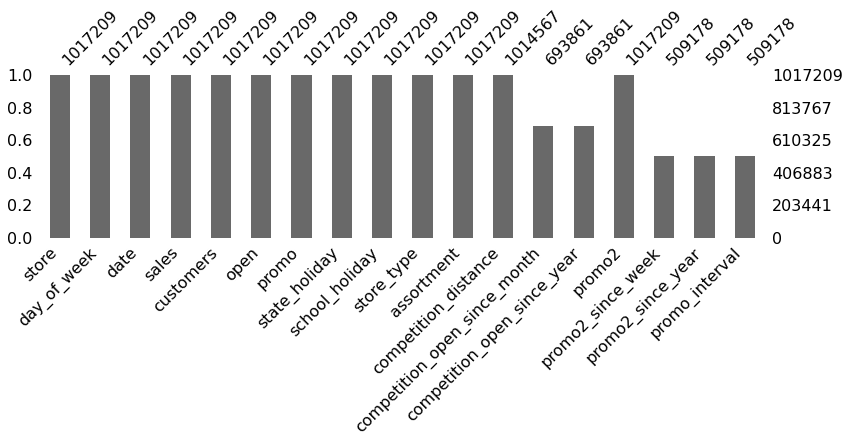

In [9]:
msno.bar(df1, figsize=(13, 3))

In [10]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Chack NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [13]:
#Encaramos como hipótese que se a coluna está zerada em relação a distância do competidor significa que ele está muito longe, 
#mas ainda existe, por isso vamos colocar a distância nas colunas zeradas muito aior que a máxima.
#df1['competition_distance'].max()

#Para o caso da data de aberturas de competidores (tanto mês como ano) acabamos por decidir que a da poderia ser extraida da 
#feature date

In [14]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 75860.0 if math.isnan(x) else x)

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year     
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
              
#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)



In [15]:
df1['promo_interval']

0                       NaN
1           Jan,Apr,Jul,Oct
2           Jan,Apr,Jul,Oct
3                       NaN
4                       NaN
                 ...       
1017204     Jan,Apr,Jul,Oct
1017205                 NaN
1017206                 NaN
1017207                 NaN
1017208    Mar,Jun,Sept,Dec
Name: promo_interval, Length: 1017209, dtype: object

In [16]:
#promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'May', 5: 'Apr', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in str(x['promo_interval']).split(',') else 0, axis =1)

In [17]:
df1.sample(5).T

,949677,984118,12721,800619,42740
store,483,359,457,835,371
day_of_week,6,3,1,7,2
date,2013-03-02 00:00:00,2013-01-30 00:00:00,2015-07-20 00:00:00,2013-07-14 00:00:00,2015-06-23 00:00:00
sales,2015,5222,5217,0,4444
customers,265,503,468,0,367
open,1,1,1,0,1
promo,0,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,d,d,a,d


In [ ]:
msno.bar(df1, figsize=(13, 3))

## 1.6 Change types

In [18]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [19]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

In [20]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical 

In [21]:
num_attributes = df1.select_dtypes (include=['int64', 'float64'])
cat_attributes = df1.select_dtypes (exclude= ['int64', 'float64', 'datetime64[ns]'])

## 1.7.1 Numerical Attributes

In [22]:
#Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max,range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
                  
#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns=['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [23]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,75860.0,75840.0,5613.013481,2330.0,8498.334094,3.599472,19.780674
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


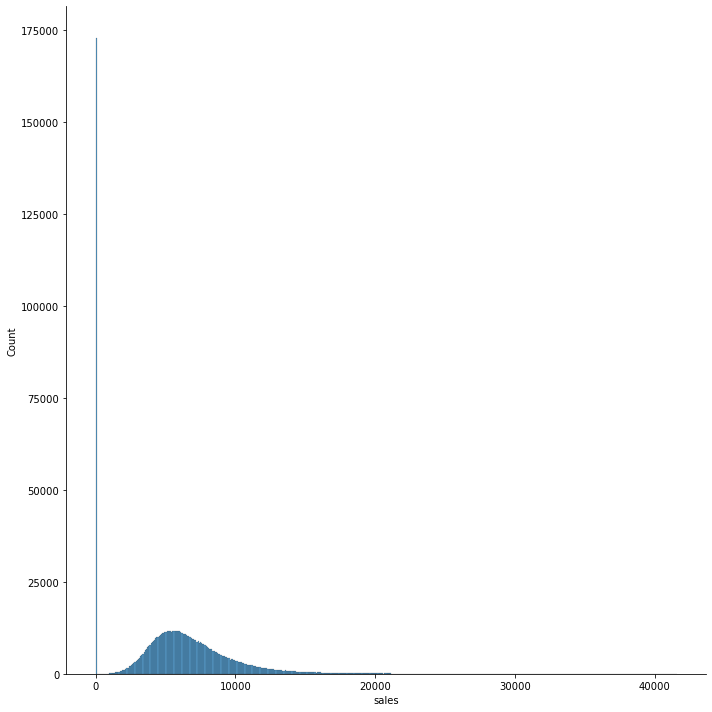

In [42]:
x=sns.displot(df1['sales'], height = 10);

In [25]:
## 1.7.2 Categorical Attributes

In [26]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

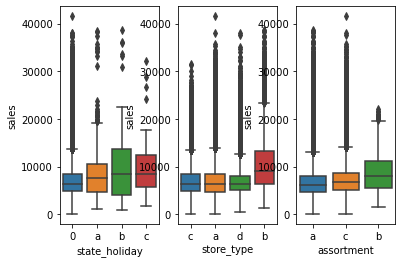

In [45]:
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

## 2.0. FEATURE ENGINEERING

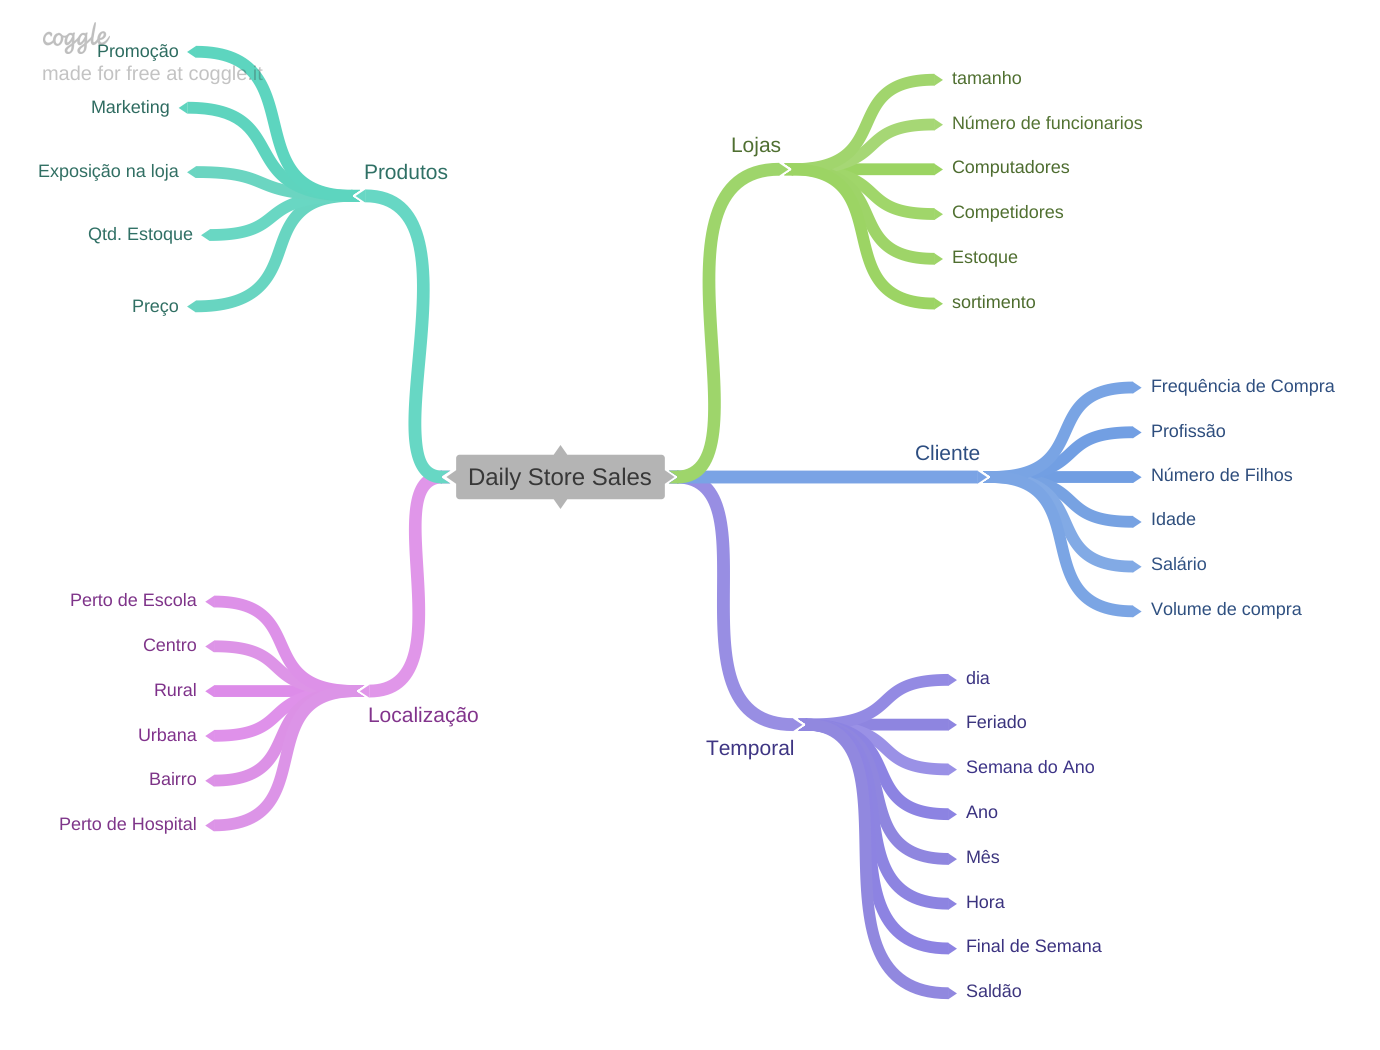

In [28]:
Image('img/Daily_Store_Sales.png')

In [29]:
df2 = df1.copy()

## 2.2 Criação de Hipóteses

### 2.1.1. Hipóteses da Loja

### 2.1.2. Hipóteses do Produto

### 2.1.3. Hipóteses Temporais

## 2.3. Feature Engineering

In [30]:
# Variaveis que serão derivadas de date:

#year
df2['year']= df2['date'].dt.year
#month
df2['month']= df2['date'].dt.month
#day
df2['day']= df2['date'].dt.day
#week of year
df2['week_of_year']= df2['date'].dt.isocalendar().week
#year week
df2['year_week']= df2['date'].dt.strftime('%Y-%W')

#competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-'+ df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x=='a' else 'extra' if x=='b' else 'extended')

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x:  'public_holiday' if x='a'else 'Easter_holiday'if x=='b'
                                                  else 'Christmas' if x=='c' else 'regular_day')


SyntaxError: invalid syntax (<ipython-input-30-f4cd27392452>, line 27)

In [ ]:
df2.head().T

## 3.0. Filtraing Feautures

In [ ]:
df3 = df2.copy()

In [ ]:
df3.head()

### 3.1. Filtragem de linhas

Nessa setor eu vou colocar todas as variáveis que restrigem o negócio:
A exemplo: a fariável open será só 0 ou 1, 0 no caso de a loja estar fechada então eu filtro as linhas que estão com valor diferente de 0 (lojas abertas).
A segunda variável é a de sales que quando 0 significa que não teve nenhuma
venda, então eu vou retirar as linhas com nenhuma venda

In [ ]:
df3 =df3[(df3['open']!=0) & df3['sales']>0]

### 3.2. Seleção de Colunas

Nessa seleção de colunas eu posso retirar as que não vão mais gerar novas ideias ou insights de negócios. Sendo pq as ideias principais já foram retiradas dos dados contidos nela ou por que não são mais necessários

In [ ]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis =1)

In [ ]:
df3.head()